In [14]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import load_img, img_to_array

import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator




In [15]:
dataset=tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/Colab Notebooks/projects/bloodcells_dataset')

Found 17092 files belonging to 8 classes.


In [16]:
classes=dataset.class_names
classes

['basophil',
 'eosinophil',
 'erythroblast',
 'ig',
 'lymphocyte',
 'monocyte',
 'neutrophil',
 'platelet']

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
input_shape=(224,224,3)


In [19]:
datagen=ImageDataGenerator(shear_range=0.2,zoom_range=0.2,horizontal_flip=True,validation_split=0.2)
training_data=datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/projects/bloodcells_dataset',target_size=(224,224),batch_size=32,class_mode='categorical',subset='training')

Found 13677 images belonging to 8 classes.


In [20]:
testing_data=datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/projects/bloodcells_dataset',target_size=(224,224),batch_size=32,class_mode='categorical',subset='validation')


Found 3415 images belonging to 8 classes.


In [21]:
base_model=VGG16(weights='imagenet',include_top=False,input_shape=input_shape)

In [22]:
model=Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(8,activation='softmax'))

In [23]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0002),metrics=['accuracy'])

In [24]:
training_set=model.fit(training_data,validation_data=testing_data,epochs=15)

Epoch 1/15
428/428 ━━━━━━━━━━━━━━━━━━━━ 6530s 15s/step - accuracy: 0.2345 - loss: 2.1946 - val_accuracy: 0.6814 - val_loss: 0.9138
Epoch 2/15
428/428 ━━━━━━━━━━━━━━━━━━━━ 307s 717ms/step - accuracy: 0.7898 - loss: 0.5780 - val_accuracy: 0.8641 - val_loss: 0.3850
Epoch 3/15
428/428 ━━━━━━━━━━━━━━━━━━━━ 307s 717ms/step - accuracy: 0.9083 - loss: 0.2714 - val_accuracy: 0.8545 - val_loss: 0.4951
Epoch 4/15
428/428 ━━━━━━━━━━━━━━━━━━━━ 339s 791ms/step - accuracy: 0.9442 - loss: 0.1811 - val_accuracy: 0.9227 - val_loss: 0.2255
Epoch 5/15
428/428 ━━━━━━━━━━━━━━━━━━━━ 305s 711ms/step - accuracy: 0.9542 - loss: 0.1526 - val_accuracy: 0.9113 - val_loss: 0.2759
Epoch 6/15
428/428 ━━━━━━━━━━━━━━━━━━━━ 306s 714ms/step - accuracy: 0.9579 - loss: 0.1409 - val_accuracy: 0.9239 - val_loss: 0.2621
Epoch 7/15
428/428 ━━━━━━━━━━━━━━━━━━━━ 305s 713ms/step - accuracy: 0.9700 - loss: 0.0938 - val_accuracy: 0.9204 - val_loss: 0.2395
Epoch 8/15
428/428 ━━━━━━━━━━━━━━━━━━━━ 301s 702ms/step - accuracy: 0.9733 - 

In [25]:
hist=training_set.history
hist.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

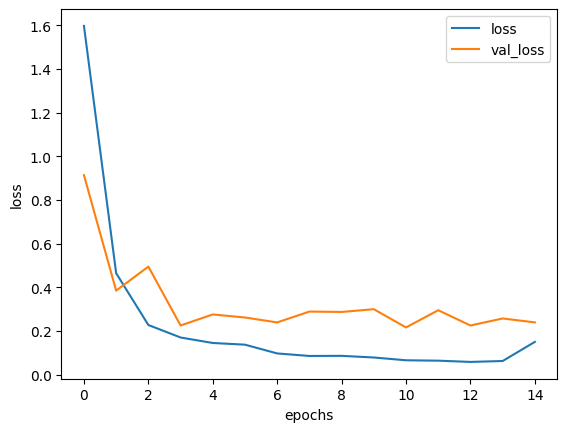

In [26]:
plt.plot(hist['loss'],label='loss')
plt.plot(hist['val_loss'],label='val_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

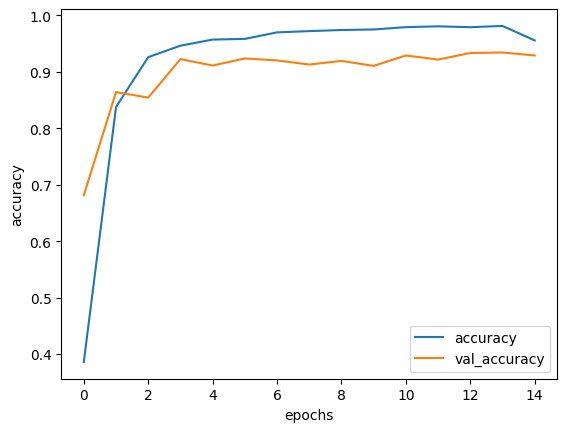

In [27]:
plt.plot(hist['accuracy'],label='accuracy')
plt.plot(hist['val_accuracy'],label='val_accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
predicted Class: basophil


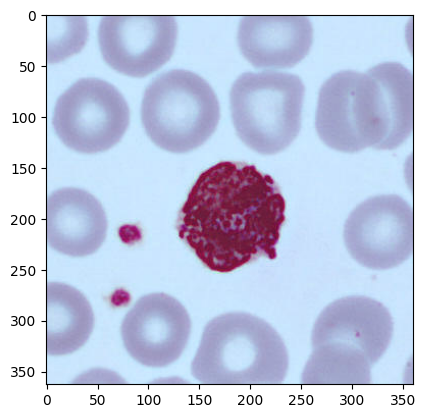

In [28]:
test_image=load_img('/content/drive/MyDrive/Colab Notebooks/projects/bloodcells_dataset/basophil/BA_100102.jpg',target_size=(224,224))
plt.imshow(cv2.imread('/content/drive/MyDrive/Colab Notebooks/projects/bloodcells_dataset/basophil/BA_100102.jpg'))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
preprocessed_img=preprocess_input(test_image)
result=model.predict(test_image)
predict_classes=np.argmax(result)
predict_classes_name=classes[predict_classes]
print('predicted Class:',predict_classes_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
predicted Class: eosinophil


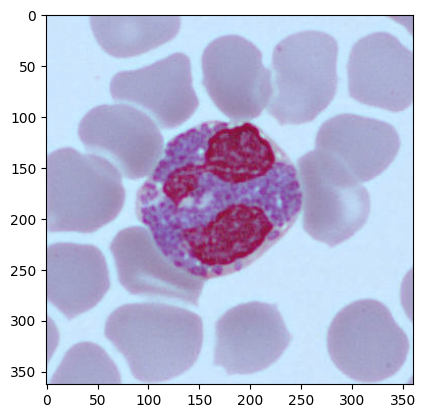

In [29]:
test_image=load_img('/content/drive/MyDrive/Colab Notebooks/projects/bloodcells_dataset/eosinophil/EO_100213.jpg',target_size=(224,224))
plt.imshow(cv2.imread('/content/drive/MyDrive/Colab Notebooks/projects/bloodcells_dataset/eosinophil/EO_100213.jpg'))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
preprocessed_img=preprocess_input(test_image)
result=model.predict(test_image)
predict_classes=np.argmax(result)
predict_classes_name=classes[predict_classes]
print('predicted Class:',predict_classes_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
predicted Class: erythroblast


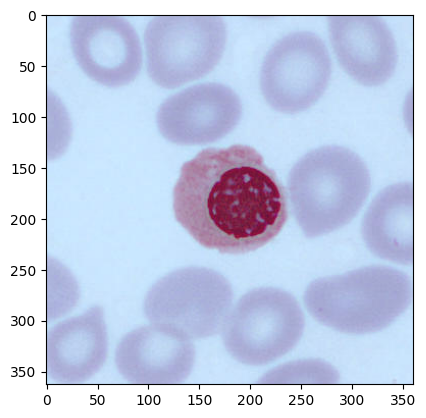

In [43]:
test_image=load_img('/content/drive/MyDrive/Colab Notebooks/projects/bloodcells_dataset/erythroblast/ERB_133116.jpg',target_size=(224,224))
plt.imshow(cv2.imread('/content/drive/MyDrive/Colab Notebooks/projects/bloodcells_dataset/erythroblast/ERB_133116.jpg'))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
preprocessed_img=preprocess_input(test_image)
result=model.predict(test_image)
predict_classes=np.argmax(result)
predict_classes_name=classes[predict_classes]
print('predicted Class:',predict_classes_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
predicted Class: ig


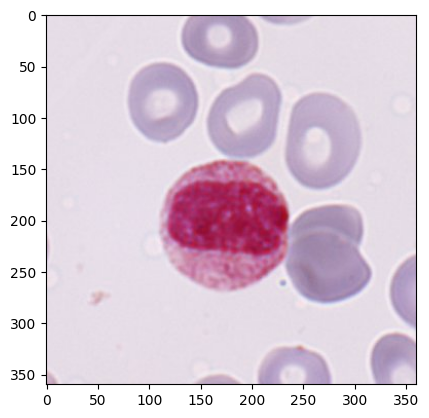

In [44]:
test_image=load_img('/content/drive/MyDrive/Colab Notebooks/projects/bloodcells_dataset/ig/IG_719838.jpg',target_size=(224,224))
plt.imshow(cv2.imread('/content/drive/MyDrive/Colab Notebooks/projects/bloodcells_dataset/ig/IG_719838.jpg'))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
preprocessed_img=preprocess_input(test_image)
result=model.predict(test_image)
predict_classes=np.argmax(result)
predict_classes_name=classes[predict_classes]
print('predicted Class:',predict_classes_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
predicted Class: lymphocyte


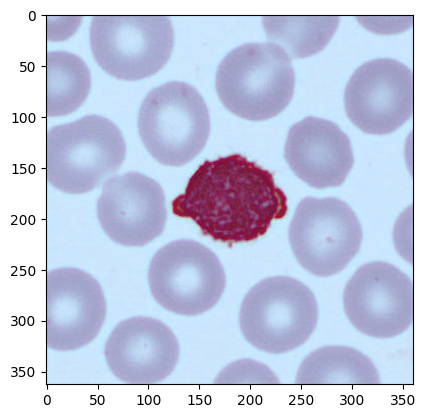

In [47]:
test_image=load_img('/content/drive/MyDrive/Colab Notebooks/projects/bloodcells_dataset/lymphocyte/LY_185647.jpg',target_size=(224,224))
plt.imshow(cv2.imread('/content/drive/MyDrive/Colab Notebooks/projects/bloodcells_dataset/lymphocyte/LY_185647.jpg'))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
preprocessed_img=preprocess_input(test_image)
result=model.predict(test_image)
predict_classes=np.argmax(result)
predict_classes_name=classes[predict_classes]
print('predicted Class:',predict_classes_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
predicted Class: monocyte


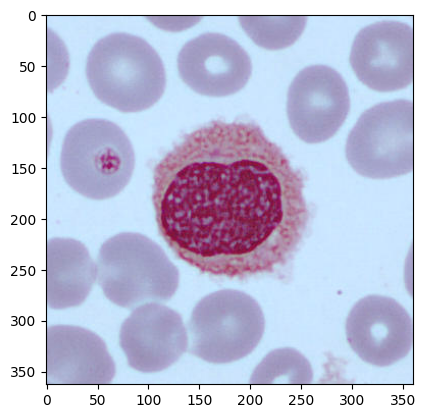

In [49]:
test_image=load_img('/content/drive/MyDrive/Colab Notebooks/projects/bloodcells_dataset/monocyte/MO_263017.jpg',target_size=(224,224))
plt.imshow(cv2.imread('/content/drive/MyDrive/Colab Notebooks/projects/bloodcells_dataset/monocyte/MO_263017.jpg'))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
preprocessed_img=preprocess_input(test_image)
result=model.predict(test_image)
predict_classes=np.argmax(result)
predict_classes_name=classes[predict_classes]
print('predicted Class:',predict_classes_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
predicted Class: neutrophil


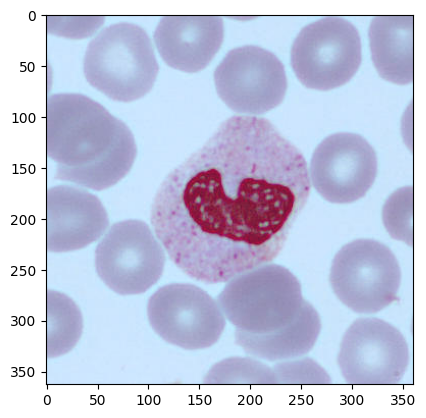

In [51]:
test_image=load_img('/content/drive/MyDrive/Colab Notebooks/projects/bloodcells_dataset/neutrophil/BNE_191041.jpg',target_size=(224,224))
plt.imshow(cv2.imread('/content/drive/MyDrive/Colab Notebooks/projects/bloodcells_dataset/neutrophil/BNE_191041.jpg'))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
preprocessed_img=preprocess_input(test_image)
result=model.predict(test_image)
predict_classes=np.argmax(result)
predict_classes_name=classes[predict_classes]
print('predicted Class:',predict_classes_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
predicted Class: platelet


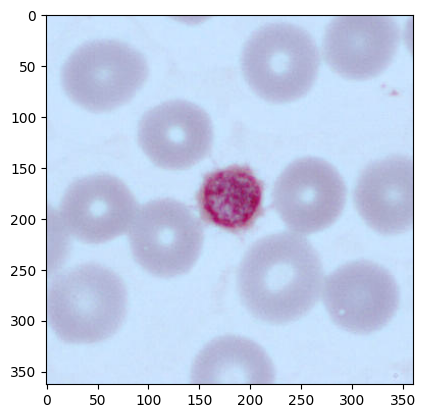

In [52]:
test_image=load_img('/content/drive/MyDrive/Colab Notebooks/projects/bloodcells_dataset/platelet/PLATELET_129292.jpg',target_size=(224,224))
plt.imshow(cv2.imread('/content/drive/MyDrive/Colab Notebooks/projects/bloodcells_dataset/platelet/PLATELET_129292.jpg'))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
preprocessed_img=preprocess_input(test_image)
result=model.predict(test_image)
predict_classes=np.argmax(result)
predict_classes_name=classes[predict_classes]
print('predicted Class:',predict_classes_name)